In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy

C:\Users\User\AppData\Local\Temp\ipykernel_25272\1067897102.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
def getTheNeededRows(frame, feature, target):
    # To get best model
    highestAccuracy, accuracyTest = 0, None
    for index, row in frame.iterrows():
        test = row["Test Name"]
        if feature in test and target in test and ("Training" in test or "SSGMM" in test or "Assemble" in test or "SemiBoost" in test):
            if row["Accuracy"] > highestAccuracy: highestAccuracy = row["Accuracy"]; accuracyTest = test

    temp = None
    if "BLR" in accuracyTest: temp = "Binary Logistic Regression"
    elif "RF" in accuracyTest: temp = "Random Forest"
    elif "NN" in accuracyTest: temp = "Neural Network"

    supervised = temp + ": " + feature + target
    supervisedAccuracy = 0

    for index, row in frame.iterrows():
        if row["Test Name"] == supervised:
            supervisedAccuracy = row["Accuracy"]    

    percentageDiff = (highestAccuracy-supervisedAccuracy)
    percentageDiff = percentageDiff / ((highestAccuracy+supervisedAccuracy)/2)
    if(percentageDiff < 0): percentageDiff = percentageDiff * -1
    percentageDiff = percentageDiff * 100


    print(feature + ": ")
    print(accuracyTest, "-", highestAccuracy)
    print(supervised, "-", supervisedAccuracy)
    print("Percentage Difference:", percentageDiff)
    if percentageDiff <= 5: print("Significant: No")
    else: print("Significant: Yes")
    print()

    return highestAccuracy, supervisedAccuracy

In [3]:
def getTheNeededRowsAGAIN(frame, game):
    # To get best model
    highestAccuracy, accuracyTest = 0, None
    for index, row in frame.iterrows():
        test = row["Test Name"]
        if game in test and ("Training" in test or "SSGMM" in test or "Assemble" in test or "SemiBoost" in test):
            if row["Accuracy"] > highestAccuracy: highestAccuracy = row["Accuracy"]; accuracyTest = test

    temp = None
    if "BLR" in accuracyTest: temp = "Binary Logistic Regression"
    elif "RF" in accuracyTest: temp = "Random Forest"
    elif "NN" in accuracyTest: temp = "Neural Network"

    supervised = temp + ": " + game
    supervisedAccuracy = 0

    for index, row in frame.iterrows():
        if row["Test Name"] == supervised:
            supervisedAccuracy = row["Accuracy"]    

    percentageDiff = (highestAccuracy-supervisedAccuracy)
    percentageDiff = percentageDiff / ((highestAccuracy+supervisedAccuracy)/2)
    if(percentageDiff < 0): percentageDiff = percentageDiff * -1
    percentageDiff = percentageDiff * 100

    print(accuracyTest, "-", highestAccuracy*100)
    print(supervised, "-", supervisedAccuracy*100)
    print("Percentage Difference:", percentageDiff)
    if percentageDiff <= 5: print("Significant: No")
    else: print("Significant: Yes")
    print()

    return highestAccuracy, supervisedAccuracy

In [4]:
def graphMaker(frame, graph1, graph2):
    index1, index2 = 0, 0

    index1 = frame.index[frame['Test Name'] == graph1].tolist()[0]
    index2 = frame.index[frame['Test Name'] == graph2].tolist()[0]
    print(index1, index2)

    accuracy = [frame.iloc[index1]["Accuracy"], frame.iloc[index2]["Accuracy"]]
    precision = [frame.iloc[index1]["Precision"], frame.iloc[index2]["Precision"]]
    recall = [frame.iloc[index1]["Recall"], frame.iloc[index2]["Recall"]]
    f1Score = [frame.iloc[index1]["F1 Score"], frame.iloc[index2]["F1 Score"]]

    testNames = [graph1, graph2]
    details = {"Accuracy": (accuracy), "Precision":precision, "Recall": recall, "F1 Score":f1Score}

    y = np.arange(len(testNames))
    height = 0.2
    multiplier = 0

    fig, ax = plt.subplots(layout='constrained', figsize=(8, 8))
    maxMeasurement = 0
    for attribute, measurement in details.items():
        for num in measurement:
            if maxMeasurement < num:
                maxMeasurement = num

        offset = height * multiplier
        ax.bar(x=(y + offset), height=measurement, width=height, label=attribute)
        multiplier += 1

    ax.set_xticks(y + height * multiplier / 2.5)
    ax.set_xticklabels(testNames)
    ax.legend()
    ax.set_ylim(0, maxMeasurement + 0.1)

In [5]:
recola = "Results/RECOLA_Results.csv"
again = "Results/AGAIN_Results.csv"

# frame = pd.read_csv(recola)
# print("A R O U S A L")
# semi4A, full4A = getTheNeededRows(frame, "All", "Arousal")
# semi1A, full1A = getTheNeededRows(frame, "Audio", "Arousal")
# semi2A, full2A = getTheNeededRows(frame, "Visual", "Arousal")
# semi3A, full3A = getTheNeededRows(frame, "Phys", "Arousal")
# print("----------------------------------------\n")

# print("V A L E N C E")
# semiV4, fullV4 = getTheNeededRows(frame, "All", "Valence")
# semiV1, fullV1 = getTheNeededRows(frame, "Audio", "Valence")
# semiV2, fullV2 = getTheNeededRows(frame, "Visual", "Valence")
# semiV3, fullV3 = getTheNeededRows(frame, "Phys", "Valence")
# print("----------------------------------------\n")

frame = pd.read_csv(again)
print("T O P   D O W N")
semiTop, fullTop = getTheNeededRowsAGAIN(frame, "TopDown")
print("----------------------------------------\n")

print("S H O O T O U T")
semiTop, fullTop = getTheNeededRowsAGAIN(frame, "Shootout")
print("----------------------------------------\n")

print("H E I S T !")
semiTop, fullTop = getTheNeededRowsAGAIN(frame, "Heist!")
print("----------------------------------------\n")


T O P   D O W N
SemiBoost: TopDownBLR12 - 76.81198910081744
Binary Logistic Regression: TopDown - 76.566757493188
Percentage Difference: 0.3197726061467376
Significant: No

----------------------------------------

S H O O T O U T
Assemble: ShootoutRF8 - 80.7574832009774
Random Forest: Shootout - 80.81857055589494
Percentage Difference: 0.0756143667296933
Significant: No

----------------------------------------

H E I S T !
Assemble: Heist!BLR12 - 74.34701492537312
Binary Logistic Regression: Heist! - 72.6679104477612
Percentage Difference: 2.284263959390843
Significant: No

----------------------------------------



78 83


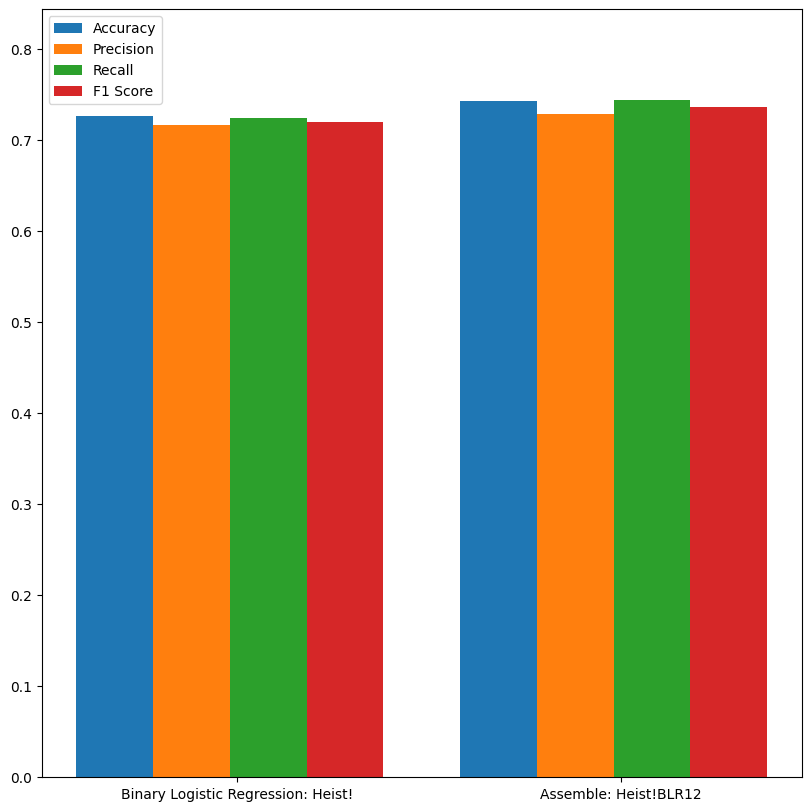

In [9]:
graphMaker(frame, "Binary Logistic Regression: Heist!", "Assemble: Heist!BLR12")